# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Old A320 with narrow pitch....
1,✅ Trip Verified | Another BA Shambles. Starte...
2,Not Verified | BA cancelled my flight home to...
3,"Not Verified | BA cancelled my flight home, t..."
4,✅ Trip Verified | Turned up 3.5 hours in advan...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
#Removing  '✅ Trip Verified |' using regular expressions
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified |', '')

<ipython-input-5-7550ccf233a5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('✅ Trip Verified |', '')


In [6]:
df['reviews'] = df['reviews'].str.replace('|','')

<ipython-input-6-0b8a351dcaa9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['reviews'] = df['reviews'].str.replace('|','')


In [7]:
#importing nltk
import nltk
nltk.download(["names","stopwords","state_union","twitter_samples","movie_reviews","averaged_perceptron_tagger","vader_lexicon","punkt"])

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
nltk.download('shakespeare')

[nltk_data] Downloading package shakespeare to /root/nltk_data...
[nltk_data]   Unzipping corpora/shakespeare.zip.


True

In [9]:
words = [w for w in nltk.corpus.state_union.words() if w.isalpha()]

In [10]:
stopwords = nltk.corpus.stopwords.words("english")

In [11]:
words = [w for w in words if w.lower() not in stopwords]

In [14]:
#breaking the sentences in each row into tokens

from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')
df['text_token']=df['reviews'].apply(regexp.tokenize)
df.head(3)

,reviews,text_token
0,Old A320 with narrow pitch. Flight perfectly...,"[Old, A320, with, narrow, pitch, Flight, perfe..."
1,Another BA Shambles. Started off well with e...,"[Another, BA, Shambles, Started, off, well, wi..."
2,Not Verified BA cancelled my flight home to ...,"[Not, Verified, BA, cancelled, my, flight, hom..."


In [15]:
# Remove stopwords
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,reviews,text_token
0,Old A320 with narrow pitch. Flight perfectly...,"[Old, A320, narrow, pitch, Flight, perfectly, ..."
1,Another BA Shambles. Started off well with e...,"[Another, BA, Shambles, Started, well, excelle..."
2,Not Verified BA cancelled my flight home to ...,"[Not, Verified, BA, cancelled, flight, home, H..."


In [16]:
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [17]:
df[['reviews', 'text_token', 'text_string']].head()

,reviews,text_token,text_string
0,Old A320 with narrow pitch. Flight perfectly...,"[Old, A320, narrow, pitch, Flight, perfectly, ...",Old A320 narrow pitch Flight perfectly time co...
1,Another BA Shambles. Started off well with e...,"[Another, BA, Shambles, Started, well, excelle...",Another Shambles Started well excellent check ...
2,Not Verified BA cancelled my flight home to ...,"[Not, Verified, BA, cancelled, flight, home, H...",Not Verified cancelled flight home Heathrow De...
3,"Not Verified BA cancelled my flight home, th...","[Not, Verified, BA, cancelled, flight, home, l...",Not Verified cancelled flight home last flight...
4,"Turned up 3.5 hours in advance, Terminal 5 at...","[Turned, 3, 5, hours, advance, Terminal, 5, Lo...",Turned hours advance Terminal London Heathrow ...


In [18]:
#creating a list of words

all_words = ' '.join([word for word in df['text_string']])

In [19]:
#Tokenize all words

tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [20]:
#Calculating the frequency distribution

from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'flight': 1715, 'The': 1248, 'London': 689, 'service': 672, 'seat': 530, 'time': 484, 'crew': 464, 'food': 438, 'good': 431, 'seats': 417, ...})

In [22]:
#picking the word who freq distribution is more than 1
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [23]:
#Checking the dataframe
df[['reviews', 'text_token', 'text_string', 'text_string_fdist']].head()

,reviews,text_token,text_string,text_string_fdist
0,Old A320 with narrow pitch. Flight perfectly...,"[Old, A320, narrow, pitch, Flight, perfectly, ...",Old A320 narrow pitch Flight perfectly time co...,Old A320 narrow pitch Flight perfectly time co...
1,Another BA Shambles. Started off well with e...,"[Another, BA, Shambles, Started, well, excelle...",Another Shambles Started well excellent check ...,Another Shambles Started well excellent check ...
2,Not Verified BA cancelled my flight home to ...,"[Not, Verified, BA, cancelled, flight, home, H...",Not Verified cancelled flight home Heathrow De...,Not Verified cancelled flight home Heathrow De...
3,"Not Verified BA cancelled my flight home, th...","[Not, Verified, BA, cancelled, flight, home, l...",Not Verified cancelled flight home last flight...,Not Verified cancelled flight home last flight...
4,"Turned up 3.5 hours in advance, Terminal 5 at...","[Turned, 3, 5, hours, advance, Terminal, 5, Lo...",Turned hours advance Terminal London Heathrow ...,Turned hours advance Terminal London Heathrow ...


In [24]:
all_words_lem = ' '.join([word for word in df['text_string_fdist']])

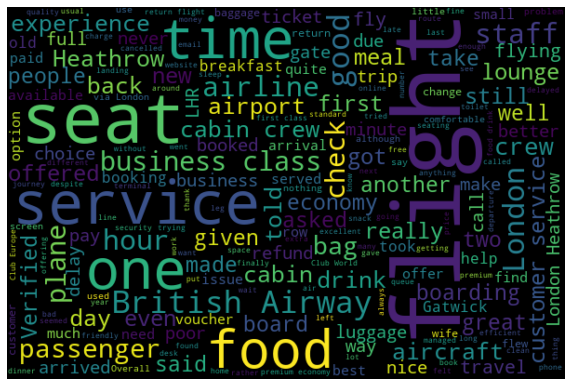

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [27]:
#Using other packages

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [29]:
#Checking the most common words

fd.most_common(3)

[('flight', 1715), ('The', 1248), ('London', 689)]

In [30]:
#plot common words

# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

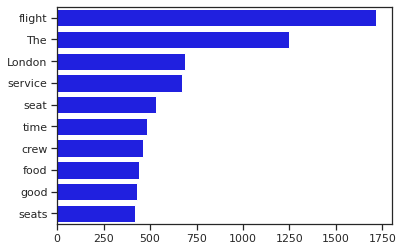

In [31]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [32]:
#Using plotly graph for more interactivity

import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

In [33]:
#Sentiment intensity analyzer

from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [35]:
#Add polarity  scores

df['polarity'] = df['text_string_fdist'].apply(lambda x: analyzer.polarity_scores(x))
df.head(10)

,reviews,text_token,text_string,text_string_fdist,polarity
0,Old A320 with narrow pitch. Flight perfectly...,"[Old, A320, narrow, pitch, Flight, perfectly, ...",Old A320 narrow pitch Flight perfectly time co...,Old A320 narrow pitch Flight perfectly time co...,"{'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'comp..."
1,Another BA Shambles. Started off well with e...,"[Another, BA, Shambles, Started, well, excelle...",Another Shambles Started well excellent check ...,Another Shambles Started well excellent check ...,"{'neg': 0.096, 'neu': 0.675, 'pos': 0.229, 'co..."
2,Not Verified BA cancelled my flight home to ...,"[Not, Verified, BA, cancelled, flight, home, H...",Not Verified cancelled flight home Heathrow De...,Not Verified cancelled flight home Heathrow De...,"{'neg': 0.177, 'neu': 0.699, 'pos': 0.123, 'co..."
3,"Not Verified BA cancelled my flight home, th...","[Not, Verified, BA, cancelled, flight, home, l...",Not Verified cancelled flight home last flight...,Not Verified cancelled flight home last flight...,"{'neg': 0.096, 'neu': 0.785, 'pos': 0.119, 'co..."
4,"Turned up 3.5 hours in advance, Terminal 5 at...","[Turned, 3, 5, hours, advance, Terminal, 5, Lo...",Turned hours advance Terminal London Heathrow ...,Turned hours advance Terminal London Heathrow ...,"{'neg': 0.183, 'neu': 0.728, 'pos': 0.09, 'com..."
5,Not Verified Boarding – at gate at LGW they ...,"[Not, Verified, Boarding, gate, LGW, called, G...",Not Verified Boarding gate LGW called Group bo...,Not Verified Boarding gate LGW called Group bo...,"{'neg': 0.011, 'neu': 0.871, 'pos': 0.119, 'co..."
6,Missing baggage customer service was the wor...,"[Missing, baggage, customer, service, worst, I...",Missing baggage customer service worst ever ex...,Missing baggage customer service worst ever ex...,"{'neg': 0.099, 'neu': 0.874, 'pos': 0.026, 'co..."
7,British Airways are not the flag carrier the...,"[British, Airways, flag, carrier, used, The, c...",British Airways flag carrier used The check st...,British Airways flag carrier used The check st...,"{'neg': 0.04, 'neu': 0.703, 'pos': 0.257, 'com..."
8,Stupidly tried BA again after a five year ga...,"[Stupidly, tried, BA, five, year, gap, paid, 7...",Stupidly tried five year gap paid 7000 wife Ba...,Stupidly tried five year gap paid 7000 wife Ba...,"{'neg': 0.222, 'neu': 0.698, 'pos': 0.079, 'co..."
9,Not Verified Seat horribly narrow; 3-4-3 on ...,"[Not, Verified, Seat, horribly, narrow, 3, 4, ...",Not Verified Seat horribly narrow 777 Thankful...,Not Verified Seat horribly narrow 777 Thankful...,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp..."


In [36]:
# Concatinating the two dataframes

df = pd.concat(
    [df, 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,reviews,text_token,text_string,text_string_fdist,polarity,neg,neu,pos,compound
0,Old A320 with narrow pitch. Flight perfectly...,"[Old, A320, narrow, pitch, Flight, perfectly, ...",Old A320 narrow pitch Flight perfectly time co...,Old A320 narrow pitch Flight perfectly time co...,"{'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'comp...",0.000,0.584,0.416,0.8934
1,Another BA Shambles. Started off well with e...,"[Another, BA, Shambles, Started, well, excelle...",Another Shambles Started well excellent check ...,Another Shambles Started well excellent check ...,"{'neg': 0.096, 'neu': 0.675, 'pos': 0.229, 'co...",0.096,0.675,0.229,0.9670
2,Not Verified BA cancelled my flight home to ...,"[Not, Verified, BA, cancelled, flight, home, H...",Not Verified cancelled flight home Heathrow De...,Not Verified cancelled flight home Heathrow De...,"{'neg': 0.177, 'neu': 0.699, 'pos': 0.123, 'co...",0.177,0.699,0.123,-0.7565


In [37]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

,reviews,text_token,text_string,text_string_fdist,polarity,neg,neu,pos,compound,sentiment
0,Old A320 with narrow pitch. Flight perfectly...,"[Old, A320, narrow, pitch, Flight, perfectly, ...",Old A320 narrow pitch Flight perfectly time co...,Old A320 narrow pitch Flight perfectly time co...,"{'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'comp...",0.000,0.584,0.416,0.8934,positive
1,Another BA Shambles. Started off well with e...,"[Another, BA, Shambles, Started, well, excelle...",Another Shambles Started well excellent check ...,Another Shambles Started well excellent check ...,"{'neg': 0.096, 'neu': 0.675, 'pos': 0.229, 'co...",0.096,0.675,0.229,0.9670,positive
2,Not Verified BA cancelled my flight home to ...,"[Not, Verified, BA, cancelled, flight, home, H...",Not Verified cancelled flight home Heathrow De...,Not Verified cancelled flight home Heathrow De...,"{'neg': 0.177, 'neu': 0.699, 'pos': 0.123, 'co...",0.177,0.699,0.123,-0.7565,negative
3,"Not Verified BA cancelled my flight home, th...","[Not, Verified, BA, cancelled, flight, home, l...",Not Verified cancelled flight home last flight...,Not Verified cancelled flight home last flight...,"{'neg': 0.096, 'neu': 0.785, 'pos': 0.119, 'co...",0.096,0.785,0.119,0.0520,positive


In [38]:
# Tweet with highest positive sentiment
df.loc[df['compound'].idxmax()].values

array(['  I was supposed to fly with Aeroflot on the 23rd of December to Moscow. But because Russia has closed its borders, like the majority of other countries, the flight was canceled, and I couldn’t get home. I’ve also tried to fly through Antalya, but the same situation occurred. On my third try, I came to Heathrow and tried to fly away to Cairo. I was declined by another company. Then I went to British Airways. Starting from testing (because Egypt requires tests), as stressful as the whole situation was, the employees were outstanding! (I’m not sure is it connected to BA, but still, I want to mention this). The crew was very helpful and extremely understanding, very professional and urgent to help, they have been a great help and I am very gracious for this. I want to separately point out one employee - Shanell (if I am not mistaken, who works at Collision testing center in Heathrow Terminal 5). She is a savior and most importantly a human, which is very rare nowadays! Carrying on

In [39]:
# Tweet with highest negative sentiment 
# ...seems to be a case of wrong classification because of the word "deficit"
df.loc[df['compound'].idxmin()].values

array(["  Hong Kong to Copenhagen via London. The whole experience is a nightmare to me and my wife. My wife lost her luggage ever since the first day of our journey on 1st August because our two pieces of luggage were left in Heathrow Airport by BA staff when we took the transit flight from the UK to Copenhagen. We went to Menzies in CPH and they filed a repor. We stated in the missing report that if the luggage was found, they should be sent to our air b&b house in Marstal in CPH on or before 3rd August or deliver to the hotel we stayed in CPH if they were found on 4th August. On 2nd August, we found that the updated status of our missing luggage in the BA website showed that one of our luggage was found while another one had a possible match. Therefore, we kept phoning and emailing Menzies staff to urge them to send the luggage to our house but they failed to do so. And the website status showed that we chose to pick up the luggage in the airport, which was not our preference but we

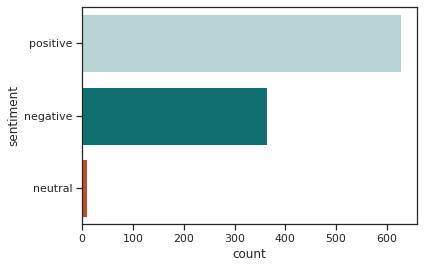

In [40]:
#Visualize data
# Number of tweets 
sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

In [45]:
#grouping by sentiment and to know the proportion

df.groupby('sentiment')['sentiment'].count()

sentiment
negative    363
neutral       9
positive    628
Name: sentiment, dtype: int64

In [50]:
#Calculating the percentages

total = 363 + 9 + 628

Positive_prop = (628/total) * 100

negative_prop = (363/total) * 100

neutral_prop = (9/total) * 100

print(Positive_prop,'-----------------', negative_prop,'------------------','---------------------',neutral_prop)

62.8 ----------------- 36.3 ------------------ --------------------- 0.8999999999999999
